Try to use Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive
%rm -f -r mlmech
! git clone https://github.com/jfra1397/mlmech.git
%cd mlmech

In [ ]:
!git checkout main
!git pull

Training starts here

In [1]:
import custom
import create_model
from importlib import reload

In [2]:
reload(custom)
from custom import *

from load_data import CustomDataGenerator


img_dir = "images/"
mask_dir = "labels/"
image_extension = ".png"
mask_extension = ".png"
img_size = (256, 256)
batch_size = 16
horizontal_split = 12
vertical_split = 1

train, validation = CustomDataGenerator.generate_data(batch_size, img_size, img_dir, mask_dir,
                                                        horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.1, flip=True, shift = shift, onelabel=onelabel, seed=seed)

Number of samples:  5443
Classes: [  0. 142. 255.]
Number of samples:  605
Classes: [  0. 142. 255.]


-123.68
137.061
0
2
[  0. 142. 255.]


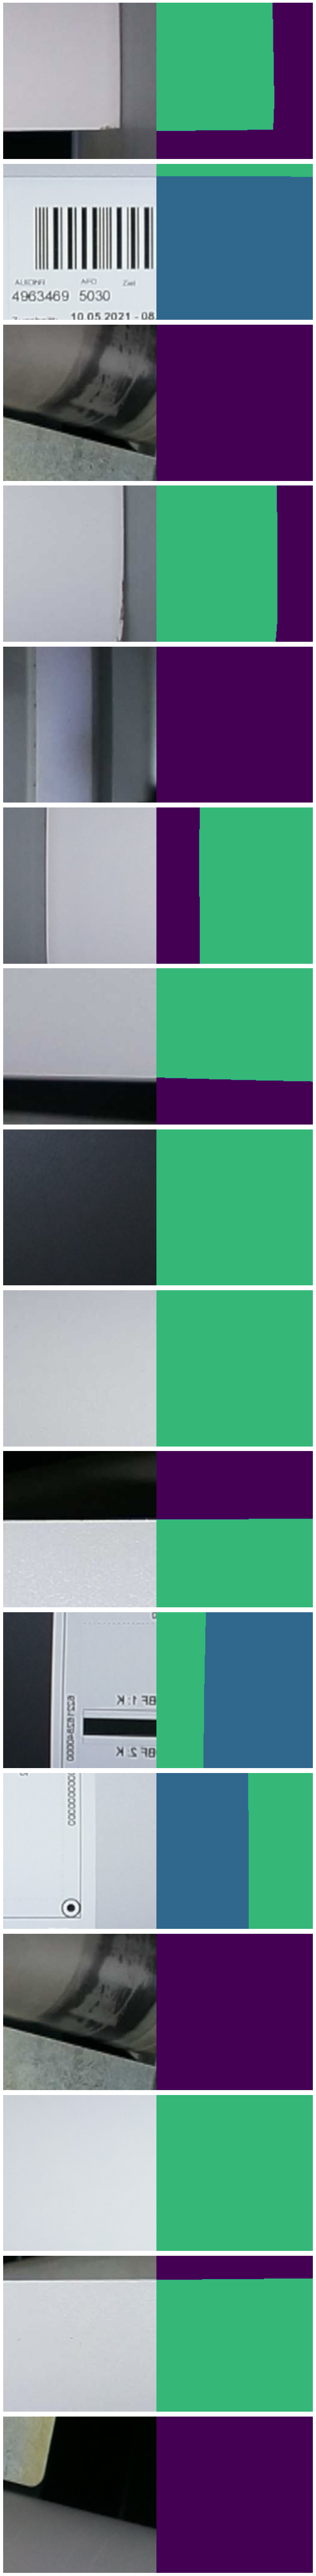

In [3]:
train.plot_batch(3)

img, mask = train.__getitem__(2)
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(train.classes)

In [4]:
reload(custom)
from custom import *

reload(create_model)
from create_model import generate_model

import tensorflow.keras.losses as losses

model = generate_model()

model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [5]:
reload(custom)
from custom import *

history = model.fit(x=train, validation_data = validation, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=1, shuffle=True)

Epoch 1/100
20/20 [==============================] - 307s 16s/step - loss: 0.9247 - accuracy: 0.6777 - val_loss: 0.2456 - val_accuracy: 0.9237
Epoch 2/100
20/20 [==============================] - 268s 14s/step - loss: 0.2260 - accuracy: 0.9367 - val_loss: 0.1888 - val_accuracy: 0.9371
Epoch 3/100
20/20 [==============================] - 270s 14s/step - loss: 0.2048 - accuracy: 0.9398 - val_loss: 0.1537 - val_accuracy: 0.9545
Epoch 4/100
20/20 [==============================] - 249s 13s/step - loss: 0.1637 - accuracy: 0.9505 - val_loss: 0.1342 - val_accuracy: 0.9582
Epoch 5/100
20/20 [==============================] - 272s 14s/step - loss: 0.1453 - accuracy: 0.9558 - val_loss: 0.1142 - val_accuracy: 0.9641
Epoch 6/100
20/20 [==============================] - 265s 14s/step - loss: 0.1231 - accuracy: 0.9626 - val_loss: 0.1086 - val_accuracy: 0.9666
Epoch 7/100
20/20 [==============================] - 259s 13s/step - loss: 0.1270 - accuracy: 0.9629 - val_loss: 0.1087 - val_accuracy: 0.9661

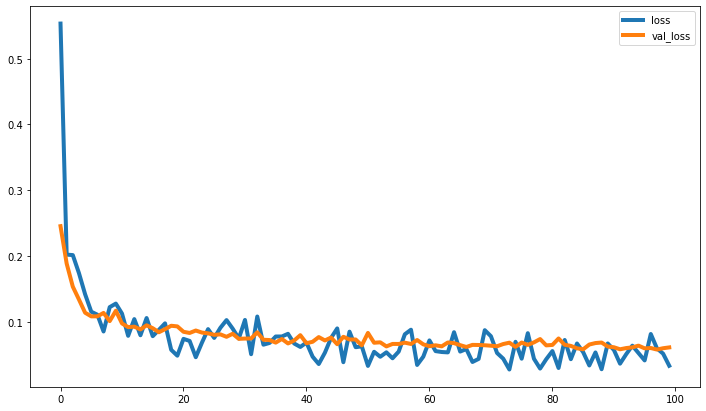

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], lw=4, label="loss")
plt.plot(history.history["val_loss"], lw=4, label="val_loss")
plt.legend()

1/1 [==============================] - 4s 4s/step


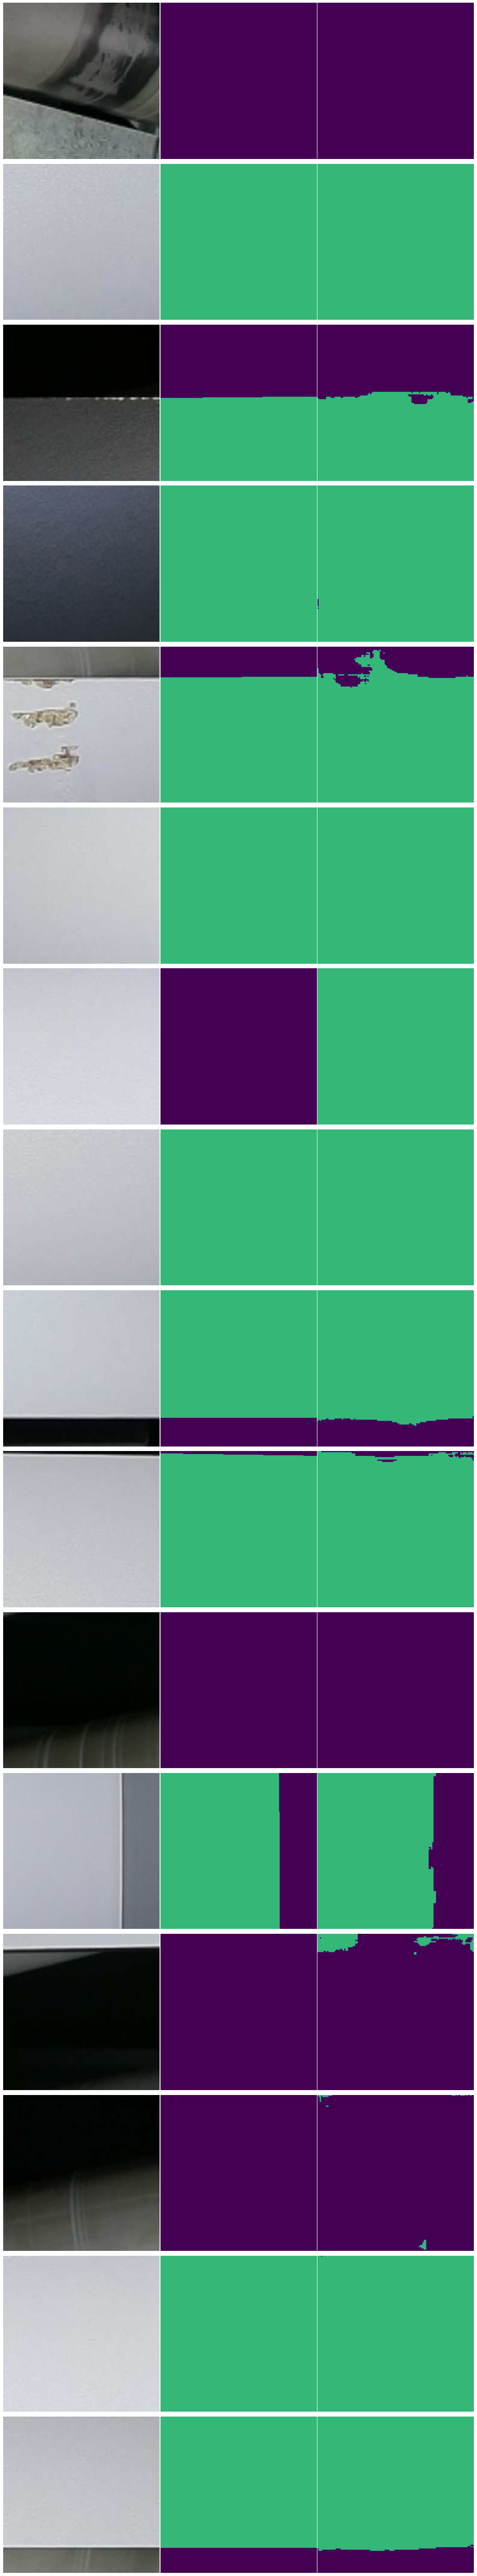

In [7]:
images, masks = train.__getitem__(2)
preds = model.predict(x=images, verbose=1)

train.plot_prediction(2, preds)

In [8]:
reload(custom)
from custom import *

import pandas as pd
import os

os.mkdir(dir_name)

from shutil import copyfile
copyfile("custom.py", dir_name + "/custom.py")
copyfile("create_model.py", dir_name + "/create_model.py")


# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = dir_name + '/history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

#save model
model.save(dir_name + "/model.tf", include_optimizer = True)
model.save_weights(dir_name + "/weights.tf")

INFO:tensorflow:Assets written to: results/julian/vgg16_6/model.tf/assets
